📥 Load and Explore the MNIST Dataset

In [ ]:
# Import the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

# Load training and test data from MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Dataset loaded successfully.")
print(f"The MNIST database has a training set of {len(x_train)} examples.")
print(f"The MNIST database has a test set of {len(x_test)} examples.")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset loaded successfully.
The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


👀 Visualize Sample Images

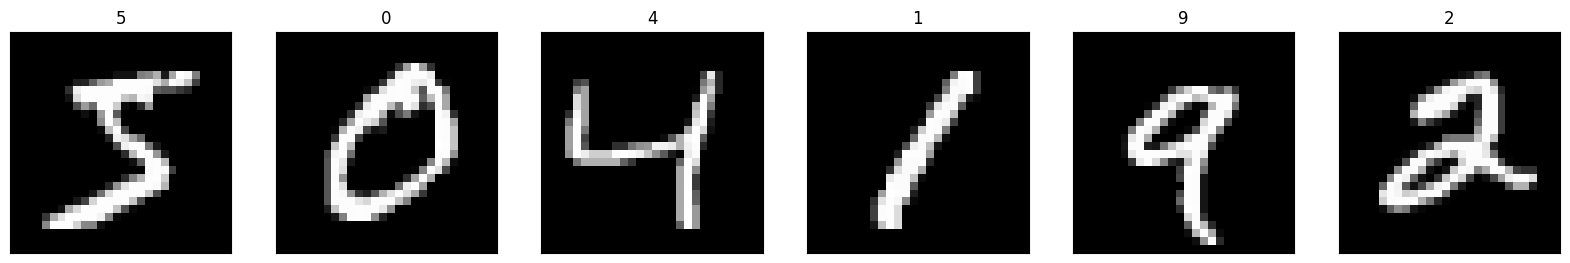

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Plot the first six training images with their labels
fig = plt.figure(figsize=(20, 20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap="gray")
    ax.set_title(str(y_train[i]))

🔎 Inspect Pixel Values of a Single Image

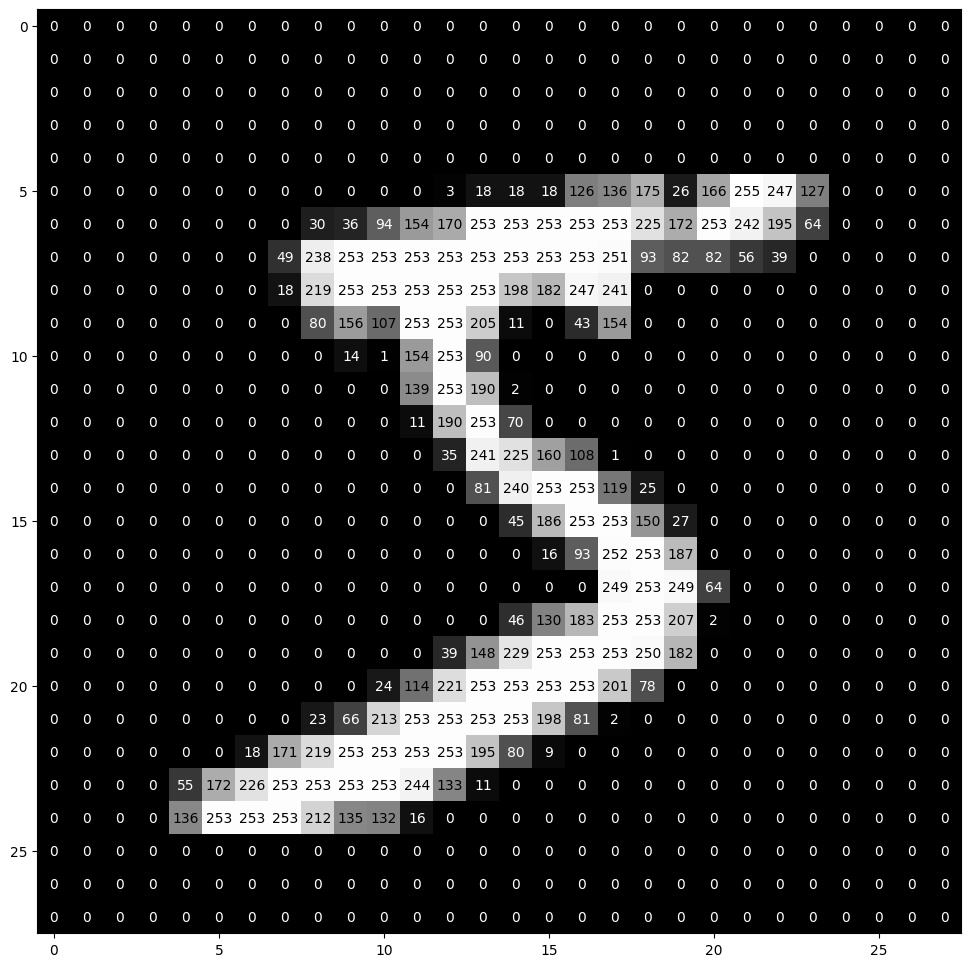

In [ ]:
def visualize_input(img, ax):
    """
    Helper function to display an image with its pixel values.
    Darker pixels are annotated with white text for visibility.
    """
    ax.imshow(img, cmap="gray")
    thresh = img.max() / 2.5
    width, height = img.shape
    for x in range(width):
        for y in range(height):
            ax.annotate(
                text=str(round(img[x][y], 2)),
                xy=(y, x),
                horizontalalignment="center",
                verticalalignment="center",
                color="white" if img[x][y] < thresh else "black",
            )


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
visualize_input(x_train[0], ax)

⚖️ Normalize the Dataset

In [ ]:
# Normalize data: subtract mean and divide by standard deviation
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train - mean) / (std + 1e-7)
x_test = (x_test - mean) / (std + 1e-7)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

🔢 One-Hot Encode Labels

In [ ]:
from tensorflow.keras.utils import to_categorical

# Get number of classes (10 digits: 0–9)
num_classes = len(np.unique(y_train))

print("Integer-valued labels:")
print(y_train[:10])

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("One-hot labels:")
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


📐 Reshape Data for CNN Input

In [ ]:
# Reshape images to include channel dimension (28x28x1)
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print("input_shape:", input_shape)
print("x_train shape:", x_train.shape)

input_shape: (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


🏗️ Define the LeNet-5 Model Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Input layer
model.add(Input(shape=(28, 28, 1)))

# C1 Convolutional Layer (6 filters, 5x5 kernel, tanh activation)
model.add(
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation="tanh", padding="same")
)

# S2 Average Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding="valid"))

# C3 Convolutional Layer (16 filters)
model.add(
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation="tanh", padding="valid")
)

# S4 Average Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding="valid"))

# C5 Convolutional Layer (120 filters)
model.add(
    Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation="tanh", padding="valid")
)

# Flatten before Fully Connected layers
model.add(Flatten())

# FC6 Fully Connected Layer (84 units)
model.add(Dense(84, activation="tanh"))

# FC7 Output Layer (10 units, Softmax for classification)
model.add(Dense(10, activation="softmax"))

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

⚙️ Compile the Model

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

🚀 Train the Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler


def lr_schedule(epoch):
    """
    Custom learning rate scheduler:
    - Higher LR in early epochs
    - Gradual decay in later epochs
    """
    if epoch <= 2:
        lr = 5e-4
    elif epoch > 2 and epoch <= 5:
        lr = 2e-4
    elif epoch > 5 and epoch <= 9:
        lr = 5e-5
    else:
        lr = 1e-5
    return lr


# Define callbacks
lr_scheduler = LearningRateScheduler(lr_schedule)
checkpointer = ModelCheckpoint(
    filepath="model.lenet5_mnist.keras",
    verbose=1,
    save_best_only=True,
)

# Train model
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[checkpointer, lr_scheduler],
    verbose=2,
    shuffle=True,
)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.08572, saving model to /content/drive/My Drive/model.lenet5_mnist.keras
1875/1875 - 12s - 6ms/step - accuracy: 0.9307 - loss: 0.2360 - val_accuracy: 0.9749 - val_loss: 0.0857 - learning_rate: 5.0000e-04
Epoch 2/20

Epoch 2: val_loss improved from 0.08572 to 0.05464, saving model to /content/drive/My Drive/model.lenet5_mnist.keras
1875/1875 - 6s - 3ms/step - accuracy: 0.9773 - loss: 0.0759 - val_accuracy: 0.9828 - val_loss: 0.0546 - learning_rate: 5.0000e-04
Epoch 3/20

Epoch 3: val_loss improved from 0.05464 to 0.04345, saving model to /content/drive/My Drive/model.lenet5_mnist.keras
1875/1875 - 5s - 3ms/step - accuracy: 0.9840 - loss: 0.0520 - val_accuracy: 0.9861 - val_loss: 0.0435 - learning_rate: 5.0000e-04
Epoch 4/20

Epoch 4: val_loss improved from 0.04345 to 0.03704, saving model to /content/drive/My Drive/model.lenet5_mnist.keras
1875/1875 - 11s - 6ms/step - accuracy: 0.9906 - loss: 0.0318 - val_accuracy: 0.9878 - val_loss: 0

💾 Load the Best (Saved) Model

In [ ]:
model.load_weights("model.lenet5_mnist.keras")

📊 Evaluate the Model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = score[1] * 100
print("\n", "Test accuracy: %.4f%%" % accuracy)


 Test accuracy: 99.0500%


📈 Plot Training Accuracy

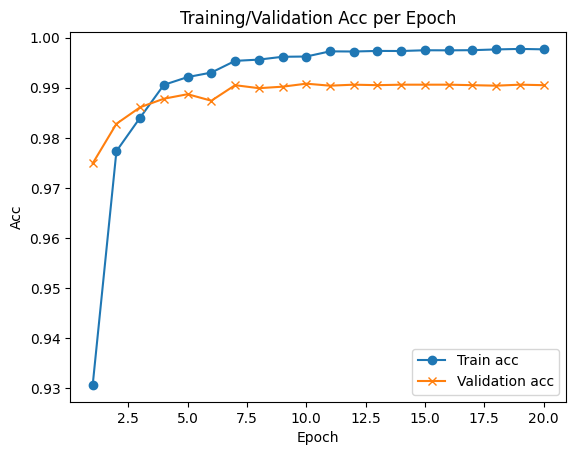

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + history.history["accuracy"], "o-")
ax.plot([None] + history.history["val_accuracy"], "x-")

ax.legend(["Train acc", "Validation acc"])
ax.set_title("Training/Validation Acc per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Acc")
plt.show()

📉 Plot Training Loss

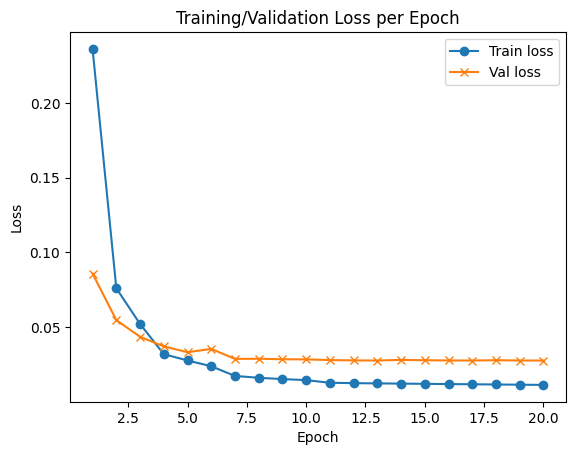

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + history.history["loss"], "o-")
ax.plot([None] + history.history["val_loss"], "x-")

ax.legend(["Train loss", "Val loss"])
ax.set_title("Training/Validation Loss per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
plt.show()

🔮 Visualize Model Predictions

In [ ]:
# Generate predictions on the test set
y_hat = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


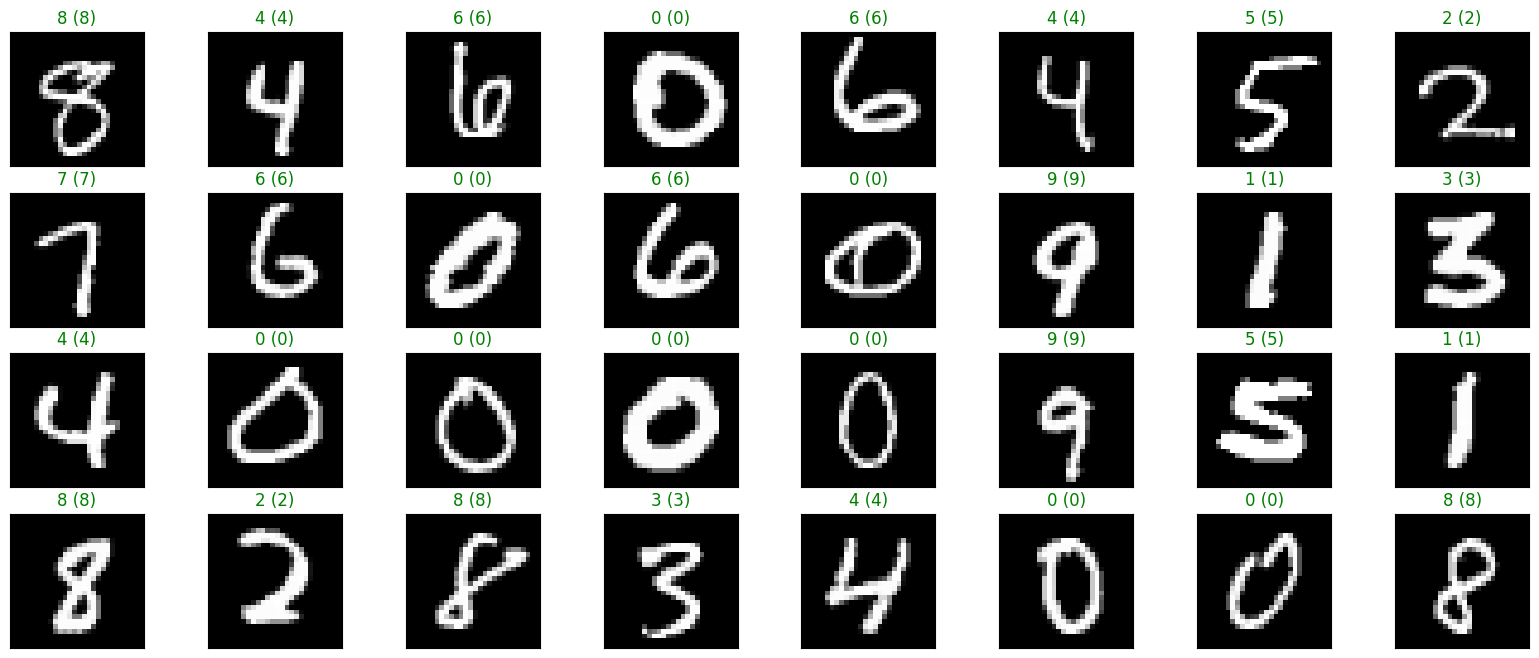

In [ ]:
# Plot a random sample of test images with predictions
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[idx], cmap="gray")
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title(
        f"{pred_idx} ({true_idx})", color=("green" if pred_idx == true_idx else "red")
    )